In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
x=df.drop('sales',axis=1)
y=df['sales']

In [7]:
# train | validation | test  : 70% | 15% |15%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [8]:
x_val, x_holdtest, y_val, y_holdtest = train_test_split(x_test,y_test,test_size=0.5,random_state=101)

In [11]:
len(x), len(x_train), len(x_val), len(x_holdtest)

(200, 140, 30, 30)

### Model Training

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
model=RandomForestRegressor(n_estimators=40)
model.fit(x_train,y_train)
val_predict=model.predict(x_val)

print(round(mean_absolute_error(y_val,val_predict),3))         # mean
print(round(np.sqrt(mean_squared_error(y_val,val_predict)),3)) # std

0.643
0.775


In [24]:
df.describe()['sales']

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

In [32]:
mae=[]
rmse=[]
for n in range(3,100):
    model=RandomForestRegressor(n_estimators=n)
    model.fit(x_train,y_train)
    val_predict=model.predict(x_val)

    mae.append(round(mean_absolute_error(y_val,val_predict),3))         # mean
    rmse.append(round(np.sqrt(mean_squared_error(y_val,val_predict)),3)) # std

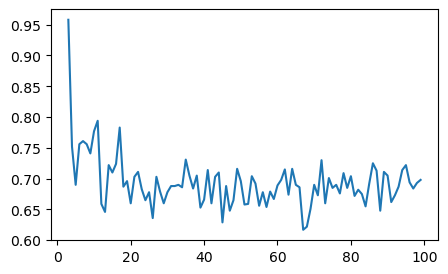

In [52]:
plt.figure(figsize=(5,3))
plt.plot(range(3,100),mae)  # n=67
plt.show()

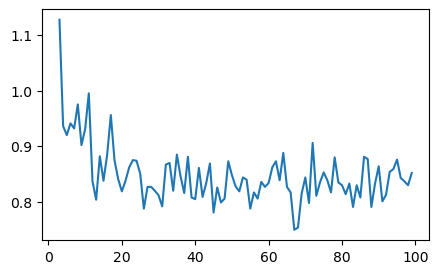

In [40]:
plt.figure(figsize=(5,3))
plt.plot(range(3,100),rmse)  # n=67
plt.show()

In [69]:
model=RandomForestRegressor(n_estimators=67)
model.fit(x_train,y_train)
val_predict=model.predict(x_val)

print(round(mean_absolute_error(y_val,val_predict),3))         # mean
print(round(np.sqrt(mean_squared_error(y_val,val_predict)),3)) # std

0.619
0.778


In [51]:
holdout_predict=model.predict(x_holdtest)
print(round(mean_absolute_error(y_holdtest,holdout_predict),3))
print(round(np.sqrt(mean_squared_error(y_holdtest,holdout_predict)),3))

0.603
0.766


In [70]:
final_model=RandomForestRegressor(n_estimators=67,random_state=101)
final_model.fit(x,y)

RandomForestRegressor(n_estimators=67, random_state=101)

In [72]:
import joblib
joblib.dump(final_model,'rfr_final_model.pkl')

['rfr_final_model.pkl']

In [76]:
joblib.dump(df.columns[:-1].tolist(),'col_names.pkl')

['col_names.pkl']

In [78]:
new_cols=joblib.load('col_names.pkl')
new_cols

['TV', 'radio', 'newspaper']

In [82]:
loaded_model=joblib.load('rfr_final_model.pkl')

In [83]:
loaded_model.predict([[230.1, 37.8, 69.2]])

C:\Users\maztl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([21.99701493])